In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(nambeware)

In [3]:
str(nambeware)

'data.frame':	59 obs. of  4 variables:
 $ Type : Factor w/ 5 levels "Bowl","CassDish",..: 2 2 2 1 3 2 5 5 3 3 ...
 $ Diam : num  10.7 14 9 8 10 10.5 16 15 6.5 5 ...
 $ Time : num  47.6 63.1 58.8 34.9 55.5 ...
 $ Price: num  144 215 105 69 134 129 155 99 38.5 36.5 ...


In [4]:
gamma.lm <- glm(Price ~ Diam, family = Gamma(link="log"), data=nambeware)

In [5]:
coef(summary(gamma.lm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.9629331,0.15618048,18.971213,2.655723e-26
Diam,0.1272179,0.01349224,9.428973,3.100673e-13


In [10]:
anova(gamma.lm, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,58,20.267870,NA,NA
Diam,1,12.47417,57,7.793702,79.59257,2.074969e-12



	Shapiro-Wilk normality test

data:  qresid(gamma.lm)
W = 0.92854, p-value = 0.001908


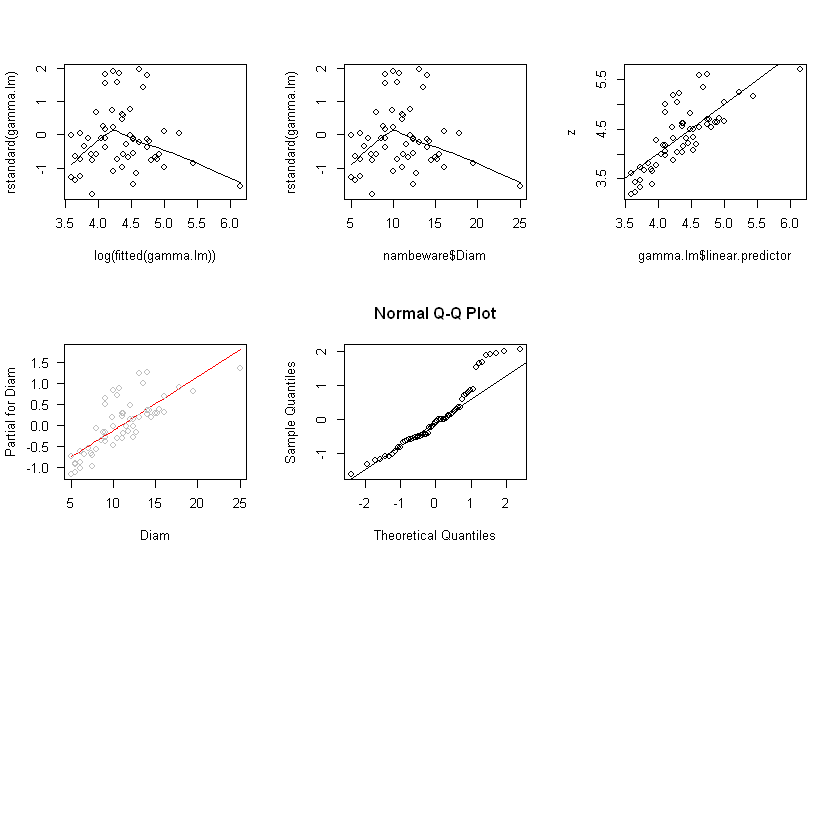

In [12]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(gamma.lm) ~ log(fitted(gamma.lm)))
scatter.smooth(rstandard(gamma.lm) ~ nambeware$Diam)

z <- resid(gamma.lm, type="working") + gamma.lm$linear.predictor
plot(z ~ gamma.lm$linear.predictor)
abline(0, 1)
termplot(gamma.lm, partial.resid=TRUE, las=1)
qqnorm(qresid(gamma.lm))
qqline(qresid(gamma.lm))
shapiro.test(qresid(gamma.lm))

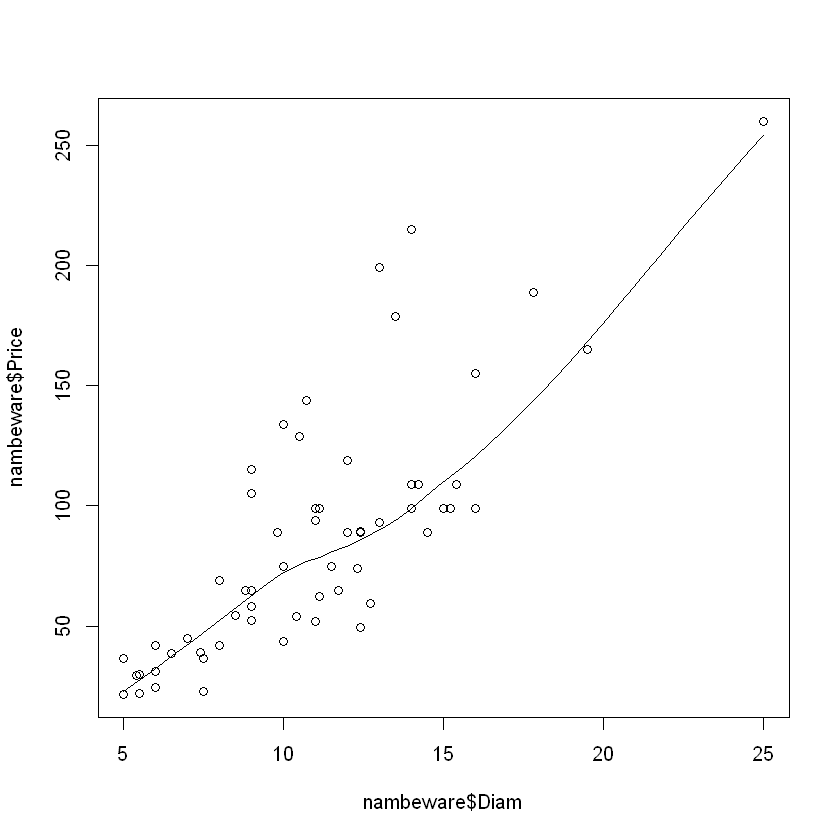

In [16]:
scatter.smooth(nambeware$Price ~ nambeware$Diam)